# Visually comparing layer models

This notebook gives some examples on how to compare two layer models.

### Table of contents<a name="toc"></a>
1. [Comparing two layers](#1)
2. [Comparing models at one point](#2)
3. [Comparing models along a face](#3)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## [1. Comparing two layers (e.g. from different models)](#toc)<a name="1"></a>

This comparison uses a topview to compare how two layers (e.g. two aquifers from different models) compare spatially. 

In [2]:
top1 = 10 * np.ones((110, 110))
bot1= 0 * np.ones((110, 110))

top2 = 10 * np.ones((110, 110))
bot2 = 0 * np.ones((110, 110))

# 1
# equal
top2[:10] = 10.
bot2[:10] = 0.

# 2
# top within: top2 lower & bot2 equal
top2[10:20] = 9.

# 3
# bottom within: bot2 higher & top2 equal
bot2[20:30] = 1.0

# 4
# within: top2 lower & bot2 higher
top2[30:40] = 9.0
bot2[30:40] = 1.0 

# 5
# outside: top2 higher & bot2 lower
top2[40:50] = 11.0
bot2[40:50] = -1.0

# 6
# top outside: top2 higher & bot2 equal
top2[50:60] = 11.

# 7
# bot outside: bot2 lower & top2 equal
bot2[60:70] = -1.0

# 8
# under: bot1 >= top2
top2[70:80] = 0.0
bot2[70:80] = -2.0

# 9
# shifted down: (top1 > top2 > bot1) & (bot1 > bot2)
top2[80:90] = 8.0
bot2[80:90] = -2.0

# 10
# shifted up: (top1 < top2) & (bot1 < bot2 < top1)
top2[90:100] = 12.
bot2[90:100] = 5.

# 11
# above: top1 <= bot2
top2[100:110] = 12.
bot2[100:110] = 10.

Side view of the different combinations

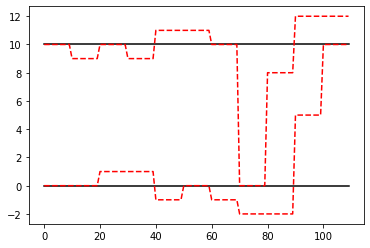

In [3]:
plt.plot(top1[:, 0], label="top1", c="k")
plt.plot(bot1[:, 0], label="bot1", c="k")

plt.plot(top2[:, 0], label="top1", ls="dashed", c="r")
plt.plot(bot2[:, 0], label="bot1", ls="dashed", c="r")

In [4]:
compare = np.zeros_like(top1)

# 1: equal
mask_eq = (top1 == top2) & (bot1 == bot2)

# 2: top within: top2 lower & bot2 equal
mask_top_within = (top1 > top2) & (bot1 == bot2)

# 3: bottom within: bot2 higher & top2 equal
mask_bot_within = (top1 == top2) & (bot1 < bot2)

# 4: within: top2 lower & bot2 higher
mask_within = (top1 > top2) & (bot1 < bot2)

# 5: outside: top2 higher & bot2 lower
mask_outside = (top1 < top2) & (bot1 > bot2)

# 6: top outside: top2 higher & bot2 equal
mask_top_oustide = (top1 < top2) & (bot1 == bot2)

# 7: bot outside: bot2 lower & top2 equal
mask_bot_outside = (top1 == top2) & (bot1 > bot2)

# 8: under: bot1 >= top2
mask_under = (bot1 >= top2)

# 9: shifted down: (top1 > top2 > bot1) & (bot1 > bot2)
mask_shift_down = ((top1 > top2) & (top2 > bot1)) & (bot1 > bot2)

# 10: shifted up: (top1 < top2) & (bot1 < bot2 < top1)
mask_shift_up = (top1 < top2) & ((bot1 < bot2) & (bot2 < top1))

# 11: above: top1 <= bot2
mask_above = (top1 <= bot2)

In [5]:
compare[mask_eq] = 1
compare[mask_top_within] = 2
compare[mask_bot_within] = 3
compare[mask_within] = 4
compare[mask_outside] = 5
compare[mask_top_oustide] = 6
compare[mask_bot_outside] = 7
compare[mask_under] = 8
compare[mask_shift_down] = 9
compare[mask_shift_up] = 10
compare[mask_above] = 11

In [6]:
np.unique(compare)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

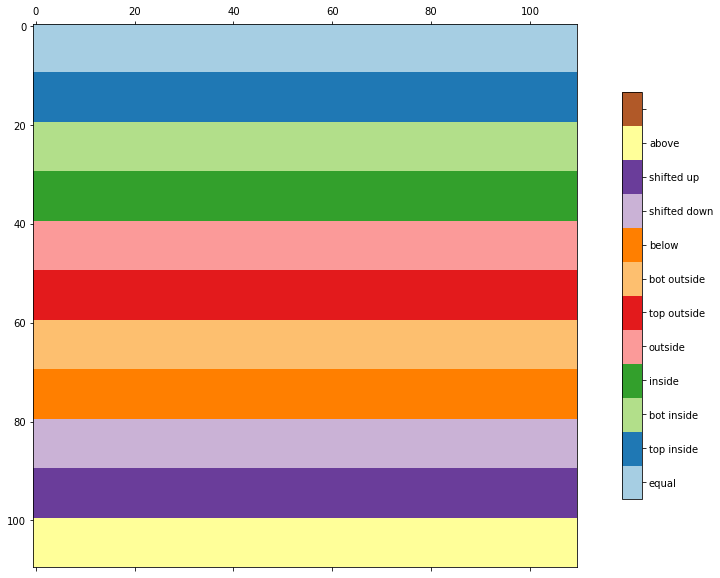

In [7]:
cmap = mpl.cm.Paired
norm = mpl.colors.Normalize(vmin=0.5, vmax=12.5)

fig, ax =  plt.subplots(1, 1, figsize=(16, 10))
im = ax.matshow(compare, cmap=cmap, norm=norm)
cbar = plt.colorbar(im, shrink=0.75)
names = [
    "equal",
    "top inside",
    "bot inside",
    "inside",
    "outside",
    "top outside",
    "bot outside",
    "below",
    "shifted down",
    "shifted up",
    "above",
    " ",
]
cbar.set_ticks(range(1, 13))
cbar.ax.set_yticklabels(names);

Check if there are no overlapping sections in masks

In [8]:
masksum = (mask_eq + 0.0 + mask_top_within + mask_bot_within + mask_within + mask_outside + 
           mask_top_oustide + mask_bot_outside + mask_under + mask_shift_down + 
           mask_shift_up + mask_above)
masksum.max()

1.0

Side view with colorcoding

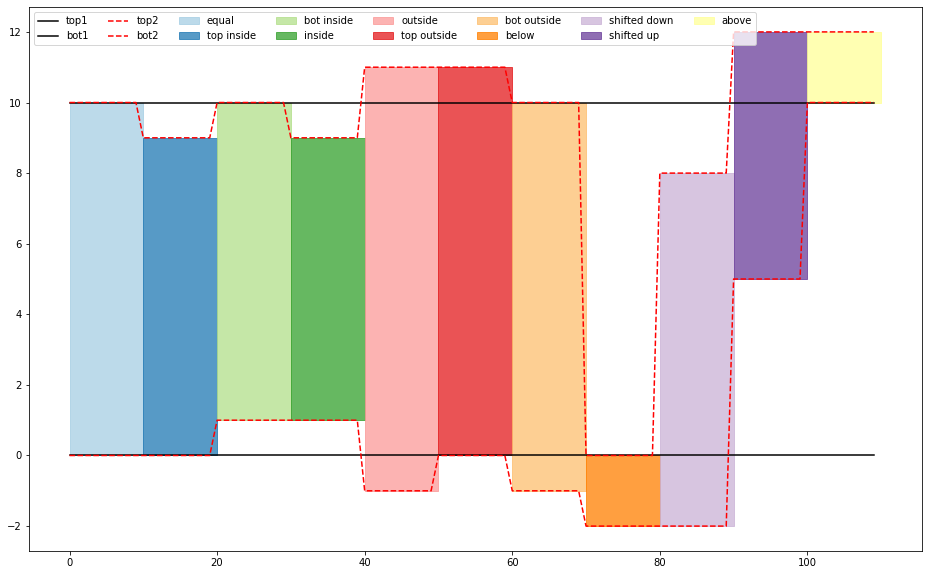

In [9]:
plt.figure(figsize=(16, 10))

plt.plot(top1[:, 0], label="top1", c="k")
plt.plot(bot1[:, 0], label="bot1", c="k")

plt.plot(top2[:, 0], label="top2", ls="dashed", c="r")
plt.plot(bot2[:, 0], label="bot2", ls="dashed", c="r")

plt.fill_between([   0, 10], top2[0, 0:1], bot2[0, 0:1],     color=cmap(norm(1)),  alpha=0.75, label="equal")
plt.fill_between([  10, 20], top2[10, 0:1], bot2[10, 0:1],   color=cmap(norm(2)),  alpha=0.75, label="top inside")
plt.fill_between([  20, 30], top2[20, 0:1], bot2[20, 0:1],   color=cmap(norm(3)),  alpha=0.75, label="bot inside")
plt.fill_between([  30, 40], top2[30, 0:1], bot2[30, 0:1],   color=cmap(norm(4)),  alpha=0.75, label="inside")
plt.fill_between([  40, 50], top2[40, 0:1], bot2[40, 0:1],   color=cmap(norm(5)),  alpha=0.75, label="outside")
plt.fill_between([  50, 60], top2[50, 0:1], bot2[50, 0:1],   color=cmap(norm(6)),  alpha=0.75, label="top outside")
plt.fill_between([  60, 70], top2[60, 0:1], bot2[60, 0:1],   color=cmap(norm(7)),  alpha=0.75, label="bot outside")
plt.fill_between([  70, 80], top2[70, 0:1], bot2[70, 0:1],   color=cmap(norm(8)),  alpha=0.75, label="below")
plt.fill_between([  80, 90], top2[80, 0:1], bot2[80, 0:1],   color=cmap(norm(9)),  alpha=0.75, label="shifted down")
plt.fill_between([ 90, 100], top2[90, 0:1], bot2[90, 0:1],   color=cmap(norm(10)), alpha=0.75, label="shifted up")
plt.fill_between([100, 110], top2[100, 0:1], bot2[100, 0:1], color=cmap(norm(11)), alpha=0.75, label="above")

plt.legend(loc="upper left", ncol=8)

## [2. Comparing models at one point](#toc)<a name="2"></a>

The idea behind this comparison is to compare the sequence of layers between two models at the same location.

In [10]:
top1 = np.array([0])
bot1 = np.array([-5, -10, -15, -20, -25, -30, -40, -50])
                
top2 = np.array([1])
bot2 = np.array([-5, -7.5, -10, -20, -25, -32.5, -37.5, -50])

In [11]:
z1 = np.r_[top1, bot1]
z2 = np.r_[top2, bot2]

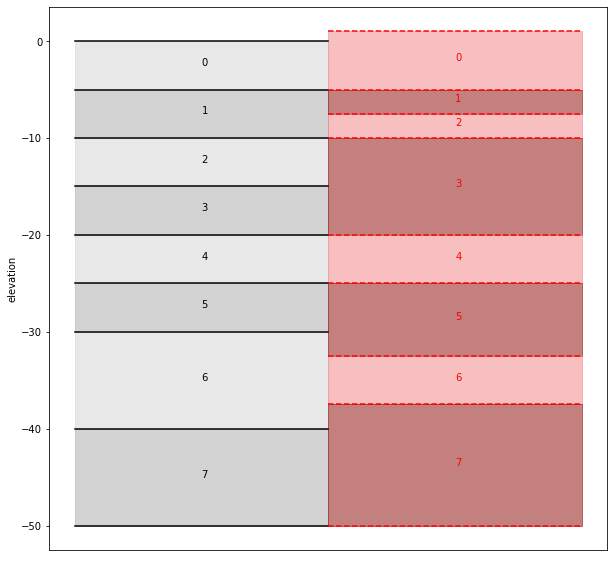

In [12]:
plt.figure(figsize=(10, 10))
for zi in z1:
    plt.plot([0, 1], [zi, zi], c="k")
for i in range(len(z1)-1):
    if i%2 == 0:
        c = "lightgray"
    else:
        c = "darkgray"
    plt.fill_between([0, 1], [z1[i], z1[i]], [z1[i+1], z1[i+1]], alpha=0.5, color=c)
    plt.text(0.5, np.mean(z1[i:i+2]), f"{i}")
    
for zi in z2:
    plt.plot([1, 2], [zi, zi], c="r", ls="dashed")
for i in range(len(z2)-1):
    plt.text(1.5, np.mean(z2[i:i+2]), f"{i}", c="r")
    if i%2 == 0:
        c = "lightcoral"
    else:
        c = "darkred"
    plt.fill_between([1, 2], [z2[i], z2[i]], [z2[i+1], z2[i+1]], alpha=0.5, color=c)

plt.ylabel("elevation")
plt.xticks([]);

## [3. Comparing models along a face](#toc)<a name="3"></a>
The idea behind this comparison is to compare two models along a face (instead of only at one point). The elevation of the layers can change in the x-direction.

In [13]:
top1 = np.array([[0, 0, 0]])
bot1 = np.array([[-5, -10, -15, -20, -25, -30, -40, -50],
                 [-5, -10, -15, -20, -25, -30, -40, -50],
                 [-5, -10, -15, -20, -25, -30, -40, -50]])
                
top2 = np.array([[1, 0.75, 0.5]])
bot2 = np.array([[-5, -7.5, -10, -20, -25, -32.5, -37.5, -50], 
                 [-5.5, -7.5, -10.5, -19, -26, -33.5, -40.5, -50],
                 [-4, -7.5, -12, -21, -23, -32.5, -35.5, -50]])

In [14]:
z1 = np.r_[top1, bot1.T]
z2 = np.r_[top2, bot2.T]

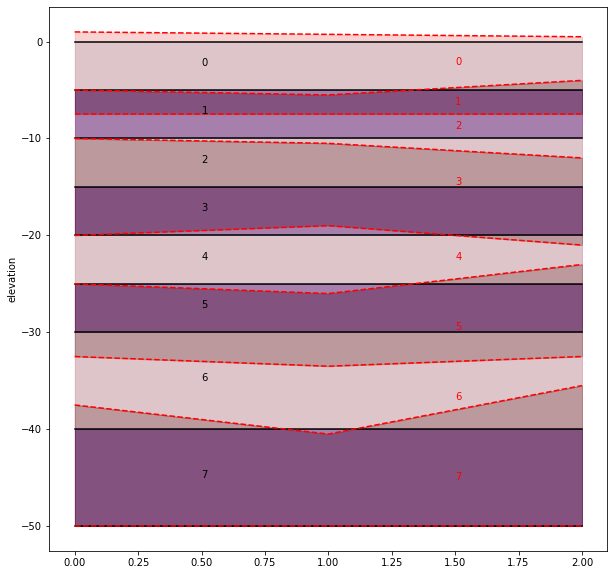

In [15]:
plt.figure(figsize=(10, 10))

for zi in z1:
    plt.plot(range(z1.shape[1]), zi, c="k")
for i in range(len(z1)-1):
    if i%2 == 0:
        c = "lightblue"
    else:
        c = "darkblue"
    plt.fill_between(range(z1.shape[1]), z1[i], z1[i+1], alpha=0.5, color=c)
    plt.text(0.5, np.mean(z1[i:i+2, 0]), f"{i}")
    
    
for zi in z2:
    plt.plot(range(z2.shape[1]), zi, c="r", ls="dashed")
for i in range(len(z2)-1):
    if i%2 == 0:
        c = "lightcoral"
    else:
        c = "darkred"
    plt.fill_between(range(z1.shape[1]), z2[i], z2[i+1], alpha=0.35, color=c)
    plt.text(1.5, np.mean(z2[i:i+2, 1]), f"{i}", c="r")

plt.ylabel("elevation");